# What happens if we apply PCA to middle eastern relations?
![Middle Eastern Relations](tmp/middle_eastern_relations/middle_eastern_relations.png)

In [1]:
from bs4 import BeautifulSoup
import numpy as np
FRIEND = 2
COMPLICATED = -1
SAME = 0
ENEMY = -2

soup = BeautifulSoup(open('tmp/middle_eastern_relations/relationship.html'), 'html')
def parse_header(tr):
    cols = tr.find_all('td', {'class': 'row_header'})
    if len(cols) <= 0:
        return None
    country_name = cols[0].text
    return country_name

def parse_row(tr):
    cols = tr.find_all('td', {'class': 'int_cell'})
    data = np.zeros(len(cols))
    for i, col in enumerate(cols):
        relationship = col.get('class')[1]
        if relationship == 'enemy':
            data[i] = ENEMY
        elif relationship == 'same':
            data[i] = SAME
        elif relationship == 'complicated':
            data[i] = COMPLICATED
        elif relationship == 'friend':
            data[i] = FRIEND
    return data
    
rows = soup.find_all('tr')
headers = []
for i, row in enumerate(rows):    
    if i == 0:
        continue
    header = parse_header(row)
    headers.append(header)
    
countries_to_headers = { c: i for i, c in enumerate(headers) }
countries_to_headers

relationship_matrix = np.zeros((len(headers), len(headers)))

for i, row in enumerate(rows):    
    if i == 0:
        continue
    result = parse_row(row)
    relationship_matrix[i - 1, :] = result


/Users/chriszhu/my-venv/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [2]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

pca = PCA(n_components=2)
transformed = pca.fit_transform(relationship_matrix)
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['country'] = headers
df

Populating the interactive namespace from numpy and matplotlib


,x,y,country
0,0.266371,-3.784399,Al-Qaida
1,-3.587878,2.914003,Egypt
2,0.242095,-3.463979,Hamas
3,4.714143,0.662909,Hezbollah
4,4.555367,1.152477,Iran
5,2.532204,4.436877,Iraq
6,-0.258022,-3.811316,ISIS
7,-3.873786,0.387117,Israel
8,-0.419265,0.117316,Palestinian Authority
9,-3.964805,0.848246,Saudi Arabia


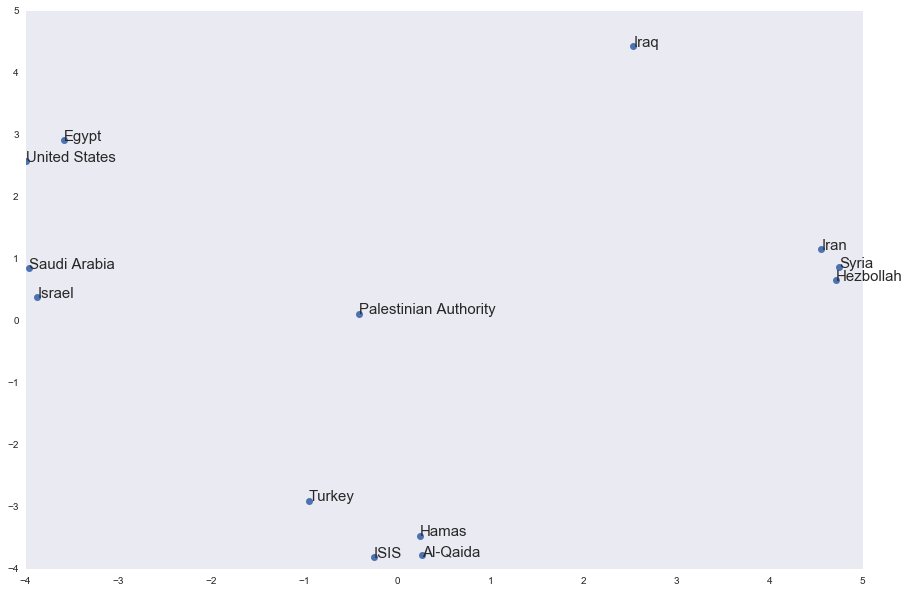

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(df['x'], df['y'], 'o')
i = 0
for x, y in zip(df['x'], df['y']):
    country = df.iloc[i]['country']
    ax.annotate('%s' % country, xy=(x, y), textcoords='data', fontsize=15) # <--
    i += 1

plt.grid()
plt.show()
